## A) Network of styles and movements (just WikiArt), Multilayer network visualization

https://github.com/jkbren/matplotlib-multilayer-network<br>
https://nbviewer.org/github/jkbren/matplotlib-multilayer-network/blob/master/matplotlib-multilayer-networks.ipynb

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
wikiart_artists_styles = pd.read_csv('..\datasets\wikiart_artists_styles_grouped.csv')
wikiart_styles = wikiart_artists_styles['style'].unique(); wikiart_artists = wikiart_artists_styles['artist'].unique(); wikiart_movements = wikiart_artists_styles['movement'].unique()

In [ ]:
G_artists_A = nx.Graph(); G_artists_A.add_nodes_from(wikiart_artists)
G_styles_A = nx.Graph(); G_styles_A.add_nodes_from(wikiart_styles)
G_movements_A = nx.Graph(); G_movements_A.add_nodes_from(wikiart_movements)

In [ ]:
for i in range(len(wikiart_artists)):
    artist_styles = (wikiart_artists_styles[wikiart_artists_styles['artist'] == wikiart_artists[i]][['style', 'count']]).reset_index(drop=True)
    for j in range(len(artist_styles)):
        for k in range(j+1, len(artist_styles)):
            if not G_styles_A.has_edge(artist_styles['style'].iloc[j], artist_styles['style'].iloc[k]):
                    G_styles_A.add_edge(artist_styles['style'].iloc[j], artist_styles['style'].iloc[k], weight= min(artist_styles['count'].iloc[j], artist_styles['count'].iloc[k]))
            else:

                G_styles_A[artist_styles['style'].iloc[j]][artist_styles['style'].iloc[k]]['weight'] += min(artist_styles['count'].iloc[j], artist_styles['count'].iloc[k])

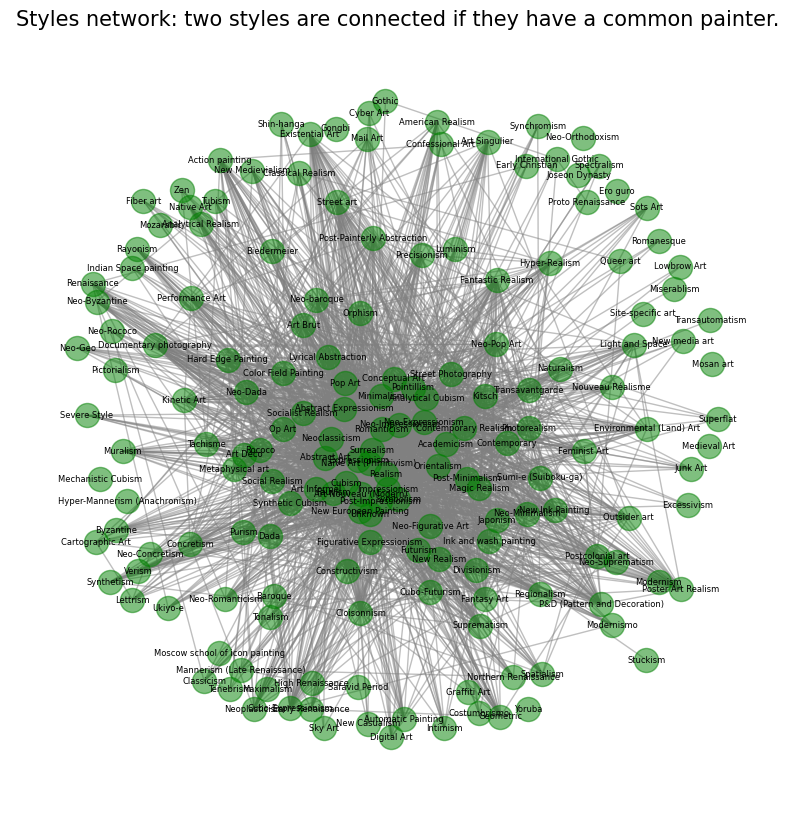

In [ ]:
plt.figure(figsize=(10,10))
pos2 = nx.spring_layout(G_styles_A, k=2.4,iterations=40)
nx.draw_networkx_nodes(G_styles_A, pos2, node_size=300, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G_styles_A, pos2, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G_styles_A, pos2, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Styles network: two styles are connected if they have a common painter.', fontsize=15)
plt.show()

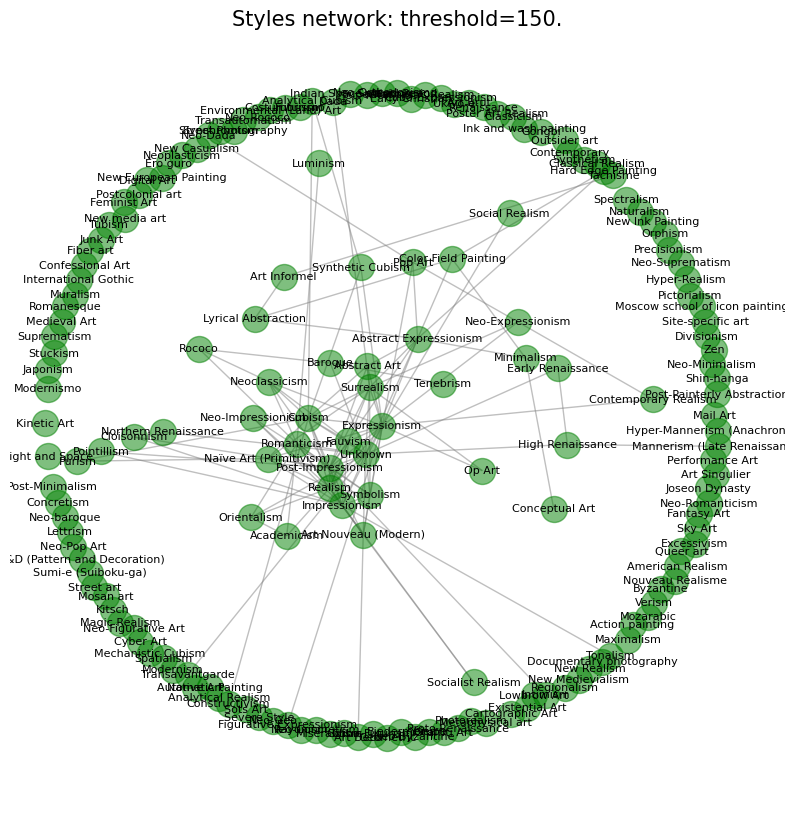

In [ ]:
threshold = 100
G2_copy = G_styles_A.copy()
for edge in G2_copy.edges():
    if G2_copy[edge[0]][edge[1]]['weight'] < threshold:
        G2_copy.remove_edge(edge[0], edge[1])

plt.figure(figsize=(10,10))
pos2c = nx.spring_layout(G2_copy, k=20.8,iterations=400)
nx.draw_networkx_nodes(G2_copy, pos2c, node_size=350, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G2_copy, pos2c, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G2_copy, pos2c, font_size=8, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Styles network: threshold=150.', fontsize=15)
plt.show()

In [ ]:
#Save graph to Gephi
nx.write_gexf(G2_copy, "gexf/G2_copy.gexf")
nx.write_gexf(G_styles_A, "gexf/G_styles_A.gexf")

Gephi drawing:

![image_2023-12-01_07-21-09.png](attachment:image_2023-12-01_07-21-09.png)

## Art movements:

In [ ]:
for i in range(len(wikiart_styles)):
    styles_movements = (wikiart_artists_styles[wikiart_artists_styles['style'] == wikiart_styles[i]][['movement', 'count']]).reset_index(drop=True)
    for j in range(len(styles_movements)):
        for k in range(j+1, len(styles_movements)):
            if not G_movements_A.has_edge(styles_movements['movement'].iloc[j], styles_movements['movement'].iloc[k]):
                if not styles_movements['movement'].iloc[j] == styles_movements['movement'].iloc[k]:
                    G_movements_A.add_edge(styles_movements['movement'].iloc[j], styles_movements['movement'].iloc[k], weight= min(styles_movements['count'].iloc[j], styles_movements['count'].iloc[k]))
            else:

                G_movements_A[styles_movements['movement'].iloc[j]][styles_movements['movement'].iloc[k]]['weight'] += min(styles_movements['count'].iloc[j], styles_movements['count'].iloc[k])
G_movements_A

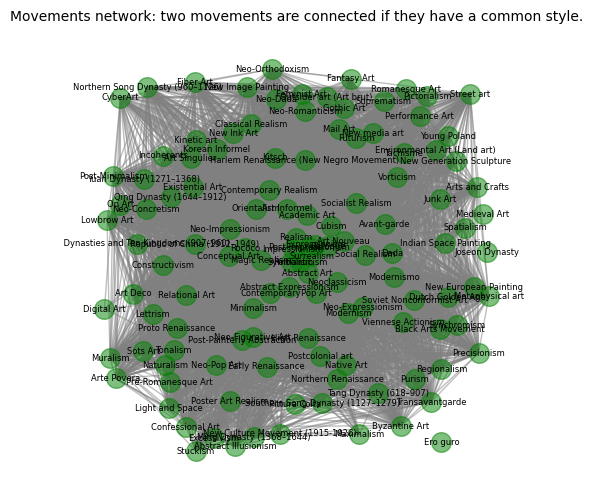

In [ ]:
#Plot the graph
plt.figure(figsize=(6,6))
pos3 = nx.spring_layout(G_movements_A, k=5.4,iterations=7)
nx.draw_networkx_nodes(G_movements_A, pos3, node_size=200, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G_movements_A, pos3, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G_movements_A, pos3, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Movements network: two movements are connected if they have a common style.', fontsize=10)
plt.show()

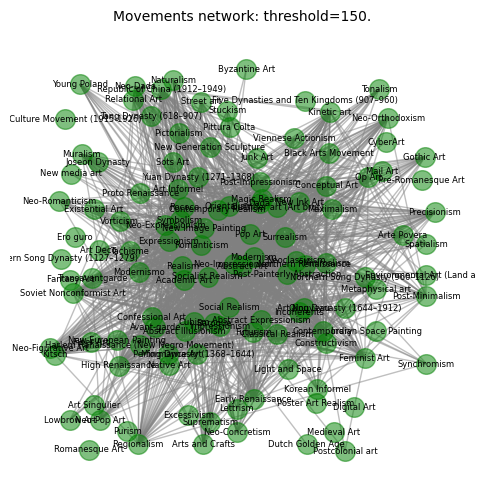

In [ ]:
#Threshold
threshold = 100
G3_copy = G_movements_A.copy()
for edge in G3_copy.edges():
    if G3_copy[edge[0]][edge[1]]['weight'] < threshold:
        G3_copy.remove_edge(edge[0], edge[1])

#Plot the graph
plt.figure(figsize=(6,6))
pos3c = nx.spring_layout(G3_copy, k=4.4,iterations=3)
nx.draw_networkx_nodes(G3_copy, pos3c, node_size=200, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G3_copy, pos3c, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G3_copy, pos3c, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Movements network: threshold=150.', fontsize=10)
plt.show()


In [ ]:
#Save graph to Gephi
nx.write_gexf(G3_copy, "gexf/G3_copy.gexf")
nx.write_gexf(G_movements_A, "gexf/G_movements_A.gexf")

Gephi drawings (thresholded):
![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Multilayer graph of painters, styles and movements (WikiArt only)

Something for 3D edges:
for i in range(len(wikiart_artists_styles)):
    G_artists_A.add_edge(wikiart_artists_styles['artist'][i], wikiart_artists_styles['style'][i])
    G_styles_A.add_edge(wikiart_artists_styles['style'][i], wikiart_artists_styles['movement'][i])
    G_movements_A.add_edge(wikiart_artists_styles['movement'][i], wikiart_artists_styles['artist'][i])

In [ ]:
pos1 = nx.spring_layout(G_artists_A, k=0.9, iterations=2)
pos2 = nx.spring_layout(G_styles_A, k=2.4,iterations=70)
pos3 = nx.spring_layout(G3_copy, k=5.4,iterations=7) #G_movements_A is too dense

Some other plotting options:<br>
https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout

<details><summary>Fruchterman-Reingold modified</summary>
    
```python

def _fruchterman_reingold(
    A, k=None, pos=None, fixed=None, iterations=50, threshold=1e-4, dim=2, seed=None
):
    # Position nodes in adjacency matrix A using Fruchterman-Reingold
    # Entry point for NetworkX graph is fruchterman_reingold_layout()
    import numpy as np

    try:
        nnodes, _ = A.shape
    except AttributeError as err:
        msg = "fruchterman_reingold() takes an adjacency matrix as input"
        raise nx.NetworkXError(msg) from err

    if pos is None:
        # random initial positions
        pos = np.asarray(seed.rand(nnodes, dim), dtype=A.dtype)
    else:
        # make sure positions are of same type as matrix
        pos = pos.astype(A.dtype)

    # optimal distance between nodes
    if k is None:
        k = np.sqrt(1.0 / nnodes)
    # the initial "temperature"  is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    # We need to calculate this in case our fixed positions force our domain
    # to be much bigger than 1x1
    t = max(max(pos.T[0]) - min(pos.T[0]), max(pos.T[1]) - min(pos.T[1])) * 0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t / (iterations + 1)
    delta = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
    # the inscrutable (but fast) version
    # this is still O(V^2)
    # could use multilevel methods to speed this up significantly
    for iteration in range(iterations):
        # matrix of difference between points
        delta = pos[:, np.newaxis, :] - pos[np.newaxis, :, :]
        # distance between points
        distance = np.linalg.norm(delta, axis=-1)
        # enforce minimum distance of 0.01
        np.clip(distance, 0.01, None, out=distance)
        # displacement "force"
        displacement = np.einsum(
            "ijk,ij->ik", delta, (k * k / distance**2 - A * distance / k)
        )
        
        # ADD THIS LINE - prevent things from flying off into infinity if not connected
        displacement = displacement - pos / ( k * np.sqrt(nnodes))

        # update positions
        length = np.linalg.norm(displacement, axis=-1)
        length = np.where(length < 0.01, 0.1, length)
        delta_pos = np.einsum("ij,i->ij", displacement, t / length)
        if fixed is not None:
            # don't change positions of fixed nodes
            delta_pos[fixed] = 0.0
        pos += delta_pos
        # cool temperature
        t -= dt
        if (np.linalg.norm(delta_pos) / nnodes) < threshold:
            break
    return pos

```
</details>


In [ ]:
#Setup
cols = ['mediumseagreen', 'darksalmon','steelblue' ]#Colors
np.random.seed(42)
graphs = [G_artists_A,G_styles_A, G3_copy]

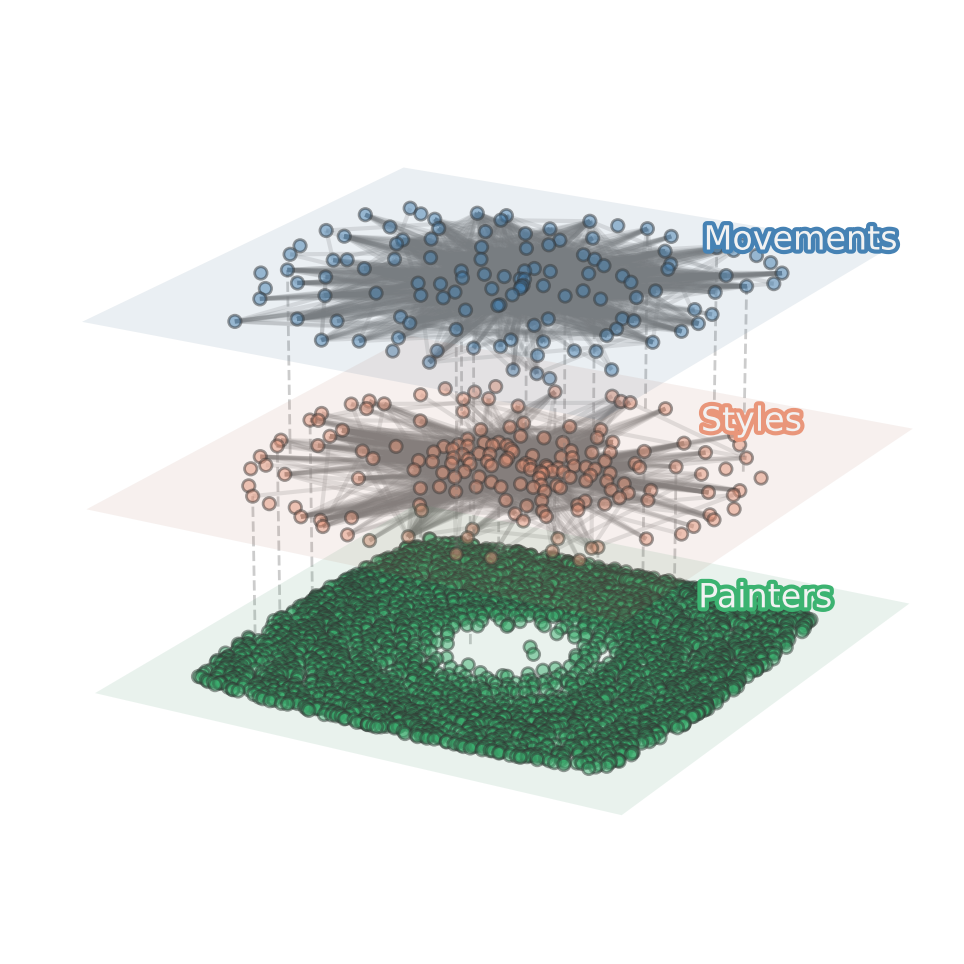

In [ ]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    if gi == 0:
        pos = pos1
    if gi == 1:
        pos = pos2
    if gi == 2:
        pos = pos3
    
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    #Inbetween layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, color="grey", zorder=gi, alpha=0.2)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2',  alpha=0.5, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    if gi == 0:
        text = "Painters"
    if gi == 1:
        text = "Styles"
    if gi == 2:
        text = "Movements"
    layertext = ax.text(0.0, 0.85, gi*0.95+0.5, text,
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()


## Save

In [7]:
#G_artists_A
nx.write_gexfi(G_styles_A, "gexf/G_styles_A.gexf")
nx.write_gexf(G_movements_A, "gexf/G_movements_A.gexf")
nx.write_gexf(G2_copy, "gexf/G2_copy.gexf")
nx.write_gexf(G3_copy, "gexf/G3_copy.gexf")

## Centrality measures


### Centrality measures on style

In [ ]:
degree_centrality_styles = nx.degree_centrality(G_styles_A)
closeness_centrality_styles = nx.closeness_centrality(G_styles_A)
betweenness_centrality_styles = nx.betweenness_centrality(G_styles_A)
eigenvector_centrality_styles = nx.eigenvector_centrality(G_styles_A, max_iter=1000)

centralities_styles_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_styles,
    'Closeness Centrality': closeness_centrality_styles,
    'Betweenness Centrality': betweenness_centrality_styles,
    'Eigenvector Centrality': eigenvector_centrality_styles
})
(centralities_styles_df)

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
Abstract Art,0.517442,0.649038,0.019326,1.648039e-01
Abstract Expressionism,0.511628,0.649038,0.024073,1.640949e-01
Academicism,0.377907,0.587342,0.011328,1.301395e-01
Action painting,0.168605,0.516625,0.000336,6.902442e-02
American Realism,0.110465,0.493517,0.000421,4.618038e-02
...,...,...,...,...
Ukiyo-e,0.052326,0.468094,0.000000,2.334724e-02
Unknown,0.802326,0.817307,0.209355,1.896445e-01
Verism,0.063953,0.475295,0.000002,3.163736e-02
Yoruba,0.000000,0.000000,0.000000,1.625412e-20


### Centrality measures on movements

In [ ]:
degree_centrality_movements = nx.degree_centrality(G_movements_A)
closeness_centrality_movements = nx.closeness_centrality(G_movements_A)
betweenness_centrality_movements = nx.betweenness_centrality(G_movements_A)
eigenvector_centrality_movements = nx.eigenvector_centrality(G_movements_A, max_iter=1000)

centralities_movements_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_movements,
    'Closeness Centrality': closeness_centrality_movements,
    'Betweenness Centrality': betweenness_centrality_movements,
    'Eigenvector Centrality': eigenvector_centrality_movements
})
centralities_movements_df

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
Abstract Expressionism,0.918033,0.920412,0.029680,0.107795
Abstract Art,0.877049,0.884738,0.008157,0.107200
Social Realism,0.852459,0.864630,0.006798,0.106051
Kinetic art,0.844262,0.858129,0.002060,0.105759
Avant-garde,0.811475,0.833074,0.001162,0.103726
...,...,...,...,...
Native Art,0.721311,0.771156,0.000000,0.096296
Pictorialism,0.721311,0.771156,0.000000,0.096296
Poster Art Realism,0.024590,0.479543,0.000000,0.003415
Purism,0.024590,0.467751,0.000000,0.003414


Centrality measures on the subgraph:

In [ ]:
degree_centrality_movements_2 = nx.degree_centrality(G3_copy)
closeness_centrality_movements_2 = nx.closeness_centrality(G3_copy)
betweenness_centrality_movements_2 = nx.betweenness_centrality(G3_copy)
eigenvector_centrality_movements_2 = nx.eigenvector_centrality(G3_copy, max_iter=1000)

centralities_movements_2_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_movements_2,
    'Closeness Centrality': closeness_centrality_movements_2,
    'Betweenness Centrality': betweenness_centrality_movements_2,
    'Eigenvector Centrality': eigenvector_centrality_movements_2
})
centralities_movements_2_df

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
Abstract Expressionism,0.557377,0.631950,0.014652,1.557765e-01
Abstract Art,0.729508,0.746850,0.070384,1.704636e-01
Social Realism,0.459016,0.583025,0.004620,1.417320e-01
Kinetic art,0.303279,0.516393,0.002384,1.006999e-01
Avant-garde,0.426230,0.568358,0.002870,1.364636e-01
...,...,...,...,...
Native Art,0.073770,0.426268,0.000000,2.865279e-02
Pictorialism,0.106557,0.445167,0.000000,4.188836e-02
Poster Art Realism,0.000000,0.000000,0.000000,7.435272e-17
Purism,0.000000,0.000000,0.000000,7.435272e-17


In [ ]:
centralities_movements_2_df['Degree Centrality'].sort_values(ascending=False).head(10)

Abstract Art              0.729508
Expressionism             0.721311
Contemporary              0.688525
Surrealism                0.680328
Realism                   0.631148
Romanticism               0.614754
Impressionism             0.614754
Post-Impressionism        0.598361
Abstract Expressionism    0.557377
Baroque                   0.557377
Name: Degree Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Closeness Centrality'].sort_values(ascending=False).head(10)

Abstract Art              0.746850
Expressionism             0.740728
Contemporary              0.717213
Surrealism                0.711566
Realism                   0.679465
Impressionism             0.669399
Romanticism               0.669399
Post-Impressionism        0.659627
Baroque                   0.636400
Abstract Expressionism    0.631950
Name: Closeness Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Betweenness Centrality'].sort_values(ascending=False).head(10)

Abstract Art          0.070384
Conceptual Art        0.056556
Expressionism         0.047621
Surrealism            0.046687
Contemporary          0.041723
Baroque               0.032658
Romanticism           0.025853
Realism               0.020515
Impressionism         0.018850
Post-Impressionism    0.017218
Name: Betweenness Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Eigenvector Centrality'].sort_values(ascending=False).head(10)

Expressionism             0.170761
Abstract Art              0.170464
Contemporary              0.168242
Surrealism                0.167546
Realism                   0.164672
Impressionism             0.163134
Post-Impressionism        0.161139
Romanticism               0.160748
Abstract Expressionism    0.155776
Symbolism                 0.155092
Name: Eigenvector Centrality, dtype: float64

In [ ]:
eigenvector_centrality_movements_2_2 = nx.eigenvector_centrality(G3_copy, max_iter=1000, weight='weight')
centralities_movements_2_df_2 = pd.DataFrame({
    'Eigenvector Centrality': eigenvector_centrality_movements_2_2
})
centralities_movements_2_df_2['Eigenvector Centrality'].sort_values(ascending=False).head(10)

Realism               0.524096
Impressionism         0.474053
Romanticism           0.317069
Post-Impressionism    0.313283
Symbolism             0.307701
Expressionism         0.285518
Academic Art          0.156206
Art Nouveau           0.137283
Surrealism            0.124829
Abstract Art          0.124621
Name: Eigenvector Centrality, dtype: float64

## Reload

In [8]:
G_artists_A = nx.Graph(); G_artists_A.add_nodes_from(wikiart_artists)
G_styles_A = nx.read_gexf("gexf/G_styles_A.gexf")
G_movements_A = nx.read_gexf("gexf/G_movements_A.gexf")
G2_copy = nx.read_gexf("gexf/G2_copy.gexf") #Modified G_styles_A
G3_copy = nx.read_gexf("gexf/G3_copy.gexf") #Modified G_movements_A

## +1) Community detection

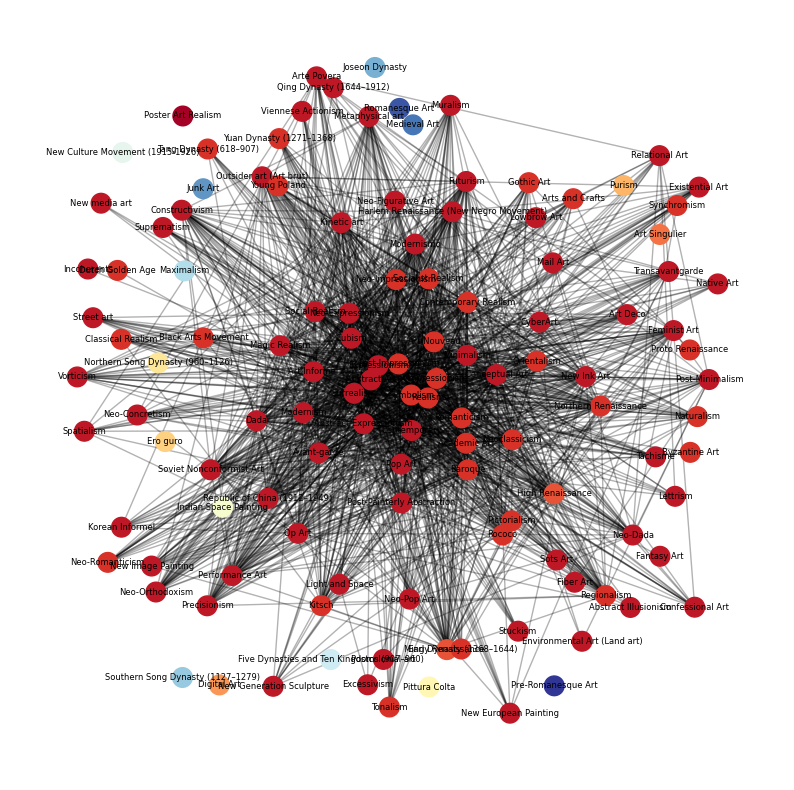

In [10]:
#Community detection

#Louvain
import community
partition = community.best_partition(G3_copy)
pos = nx.spring_layout(G3_copy, k=5.9, iterations=10)
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(G3_copy, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G3_copy, pos, alpha=0.3)
nx.draw_networkx_labels(G3_copy, pos, font_size=6, font_family='sans-serif', font_color='black',)
plt.show()


## Network connection: Six Degrees of Francis Bacon
Network of the people connected to Francis Bacon, sadly the people in the set are mostly all born in the 16th century and are English so most philosophers in this list are not super relevant, there is no Kant, Nietzsche, etc.  But good example of a network

http://www.sixdegreesoffrancisbacon.com/?ids=10000473&min_confidence=60&type=network

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
import igraph as ig #To install: conda install -c conda-forge python-igraph  
people = pd.read_csv('datasets/SDFB_people_.csv')
relationships = pd.read_csv('datasets/SDFB_relationships_.csv')

#I used igraph, because it's faster than networkx, and graph-tool sucks on Windows
network = relationships.rename(columns={'id': 'relationship_id', }).drop(columns=['created_by', 'approved_by', 'citation'])
print(network.head(), '\n')
cols = network.columns.tolist()
cols = cols[1:3] + cols[0:1] + cols[3:]
network = network[cols]
network = network[network['person1_index'] != 10050190] #for some reason, there is no person with this id, I did a loop
# I used the documentation here: https://python.igraph.org/en/stable/generation.html#from-pandas-dataframe-s  this I followed
# this is important too: https://python.igraph.org/en/stable/api/igraph.Graph.html#DataFrame  
g = ig.Graph.DataFrame(network, directed=False, vertices=people[['id', 'display_name','historical_significance','birth_year','death_year']], use_vids=False)
print(g.summary().replace(',', '\n'))
```
    
</p>
</details>

<details><summary><u>Code for filtering</u></summary>
<p>
    
```python
filtered = g.vs.select(_degree = 0) #https://python.igraph.org/en/stable/tutorial.html#selecting-vertices-and-edges
g.delete_vertices(filtered)

import cairo #Needed for plotting #import cairocffi as cairo  # can do matplotlib too
#layout = g.layout(layout='auto')
#ig.plot(g, layout = layout) #ig.plot(g) #looks even worse

```
    
</p>
</details>

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
layout = g.layout(layout='reingold_tilford_circular') #kamada_kawai requires too much computing, 'fruchterman_reingold' is too dense
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "blue"
visual_style['bbox'] = (900, 900)
visual_style["layout"] = layout
#ig.plot(g, **visual_style) #Commented out because it takes big memory
# Needs improvement, but it's a start
```
    
</p>
</details>
